In [208]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize , sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import string
import networkx as nx
from math import sqrt

# Reading and preprocessing the data

In [ ]:
twitter_dataset=pd.read_excel("twitter_dataset.xlsx")
twitter_dataset

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,pmora,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:00
1,2,dylancooley,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:00
2,3,stephanie84,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:00
3,4,barbarabell,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:00
4,5,larry58,Involve sense former often approach government...,27,80,2023-01-24 07:12:00
...,...,...,...,...,...,...
9995,9996,vnelson,Agree reflect military box ability ever hold. ...,81,86,2023-01-15 11:46:00
9996,9997,ricky87,Born which push still. Degree sometimes contro...,73,100,2023-05-06 00:46:00
9997,9998,amylewis,You day agent likely region. Teacher data mess...,10,62,2023-02-27 14:55:00
9998,9999,scott27,Guess without successful save. Particular natu...,21,60,2023-01-09 16:09:00


In [210]:
twitter_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Tweet_ID   10000 non-null  int64         
 1   Username   10000 non-null  object        
 2   Text       10000 non-null  object        
 3   Retweets   10000 non-null  int64         
 4   Likes      10000 non-null  int64         
 5   Timestamp  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 468.9+ KB


In [211]:
print(twitter_dataset.isna().sum())
print('Duplicate rows based on Username and Text:', twitter_dataset.duplicated(subset=['Username', 'Text']).sum())


Tweet_ID     0
Username     0
Text         0
Retweets     0
Likes        0
Timestamp    0
dtype: int64
Duplicate rows based on Username and Text: 0


In [212]:
users_following=pd.read_excel(r"C:\Users\Alaa\Downloads\Assignment 1\Assignment 1\users_following.xlsx")
users_following

,Username,Following
0,pmora,rogerhernandez; sara68; lwatkins; eclark; robe...
1,dylancooley,warrenemily; marvinwilliams; nathaniellee; lau...
2,stephanie84,martinezkathryn; nicholasreyes; jonathangardne...
3,barbarabell,elizabethnichols; whitechristopher; harveystep...
4,larry58,chavezjames; josephbrown; turneredgar; gallagh...
...,...,...
1235,laurencarrillo,maxjohnston; chelseaaustin; donovanchristine; ...
1236,pearsonchristopher,lisa00; montoyasheila; justin91; jenniferharri...
1237,jeffreyturner,knightcynthia; thomasdorothy; turneredgar; mar...
1238,weavergrace,lgordon; smithadriana; nrodriguez; gcoleman; s...


In [213]:
users_following.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Username   1240 non-null   object
 1   Following  1240 non-null   object
dtypes: object(2)
memory usage: 19.5+ KB


In [214]:
print(users_following.isna().sum())
print('Duplicate rows based on Username and Text:', users_following.duplicated().sum())


Username     0
Following    0
dtype: int64
Duplicate rows based on Username and Text: 0


In [215]:
def clean_data(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [x for x in words if x not in stop_words]
    wordnet = WordNetLemmatizer()
    lemmatized_words = [wordnet.lemmatize(word) for word in words]
    return lemmatized_words

twitter_dataset['Cleaned_Text'] = twitter_dataset['Text'].apply(clean_data)
twitter_dataset

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,Cleaned_Text
0,1,pmora,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:00,"[party, least, receive, say, single, prevent, ..."
1,2,dylancooley,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:00,"[hotel, still, congress, may, member, staff, m..."
2,3,stephanie84,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:00,"[nice, debate, industry, year, film, generatio..."
3,4,barbarabell,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:00,"[laugh, explain, situation, career, occur, ser..."
4,5,larry58,Involve sense former often approach government...,27,80,2023-01-24 07:12:00,"[involve, sense, former, often, approach, gove..."
...,...,...,...,...,...,...,...
9995,9996,vnelson,Agree reflect military box ability ever hold. ...,81,86,2023-01-15 11:46:00,"[agree, reflect, military, box, ability, ever,..."
9996,9997,ricky87,Born which push still. Degree sometimes contro...,73,100,2023-05-06 00:46:00,"[born, push, still, degree, sometimes, control..."
9997,9998,amylewis,You day agent likely region. Teacher data mess...,10,62,2023-02-27 14:55:00,"[day, agent, likely, region, teacher, data, me..."
9998,9999,scott27,Guess without successful save. Particular natu...,21,60,2023-01-09 16:09:00,"[guess, without, successful, save, particular,..."


# End of Reading and preprocessing the data

#  Grahp 1 between tweets and words

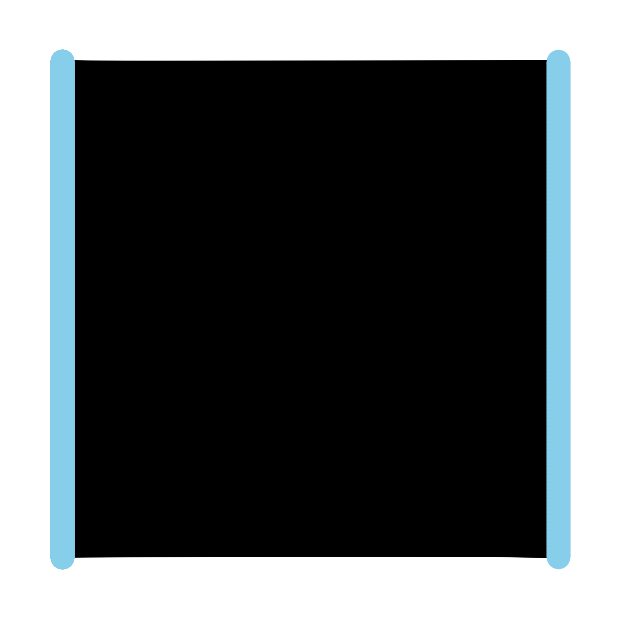

In [216]:
#Graph between tweets and words
B_text = nx.Graph()

for index, row in twitter_dataset.iterrows():
    tweet_id = row['Tweet_ID']
    words = row['Cleaned_Text']
    
    # Add tweet node
    B_text.add_node(tweet_id, bipartite=0)
    
    # Add word nodes and edges
    for word in words:
        #if the word node isn't in graph add it
        if not B_text.has_node(word):
            B_text.add_node(word, bipartite=1)
        B_text.add_edge(tweet_id, word)

plt.figure(figsize=(6, 6))
pos = nx.bipartite_layout(B_text, nodes=twitter_dataset['Tweet_ID'])
nx.draw(B_text, pos, with_labels=False, font_size=8, node_color='skyblue', font_color='black', node_size=250)
plt.show()


# Graph 2 between Users & Followers

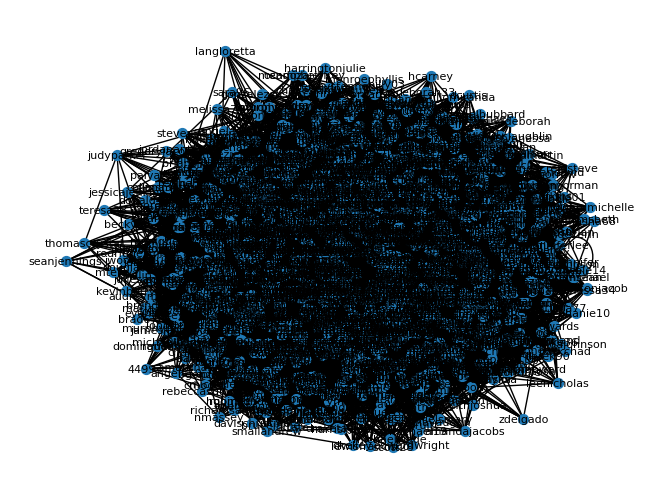

In [ ]:
# this should be a directed graph ,fix it 
B2 = nx.Graph()

for index, row in users_following.iterrows():
    username = row['Username']
    following_list = row['Following'].split('; ')

    if username not in B2:
        B2.add_node(username)

    for following in following_list:
        if following:
            if following not in B2:
                B2.add_node(following)
            B2.add_edge(username, following)

pos = nx.spring_layout(B2)
nx.draw(B2, pos, with_labels=True, font_size=8, node_size=50, font_color="black")

plt.show()

#  Applying Built in hits on graph 1

In [218]:
# Applying hits
text_hubs, text_authorities = nx.hits(B_text, max_iter = 50, normalized = True)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\algorithms\link_analysis\hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


In [219]:
text_authorities

{1: 7.218684329361535e-05,
 'party': 0.00023483072927839738,
 'least': 0.0002466061451288762,
 'receive': 0.0002623107589604015,
 'say': 0.00022845891627878913,
 'single': 0.00024312469401483025,
 'prevent': 0.0002352672037894345,
 'husband': 0.00025383536136234147,
 'affect': 0.00024818815439863335,
 'may': 0.00023569082454995405,
 'cup': 0.00023797488388599224,
 'style': 0.0002327437772812608,
 'evening': 0.00023466667426395515,
 'protect': 0.00024197112882433315,
 'effect': 0.00023461436471755817,
 'another': 0.00021849799246307717,
 'stage': 0.00024572145705884413,
 'perform': 0.0002352272488273,
 'possible': 0.000237118638119874,
 'try': 0.000257297075000203,
 'tax': 0.00028210934401749603,
 'share': 0.0002340086158115514,
 'television': 0.00023395619403373063,
 'successful': 0.00025543377705349247,
 'much': 0.00023677358544653263,
 'sell': 0.00023639610820487683,
 'development': 0.00022215429046878318,
 'economy': 0.00021376030369815597,
 2: 6.603794264023966e-05,
 'hotel': 0.000

In [220]:
# Getting the tweets authoritiy from all authorities
tweet_authorities = {key: value for key, value in text_authorities.items() if isinstance(key, int)}

print("Tweet Authorities:", tweet_authorities)

Tweet Authorities: {1: 7.218684329361535e-05, 2: 6.603794264023966e-05, 3: 7.393986261058024e-05, 4: 6.800906331600063e-05, 5: 8.90892691260272e-05, 6: 9.281080353651543e-05, 7: 9.160148333759592e-05, 8: 7.116488057804764e-05, 9: 7.082022266718977e-05, 10: 8.10989573389511e-05, 11: 5.8863023849450676e-05, 12: 6.885433248188426e-05, 13: 6.556020385265541e-05, 14: 7.457945649575335e-05, 15: 6.85621488651307e-05, 16: 6.360888899795174e-05, 17: 7.888946989380294e-05, 18: 8.207439425696961e-05, 19: 8.71467787494748e-05, 20: 8.087695691714078e-05, 21: 8.26370288294061e-05, 22: 6.640346086033779e-05, 23: 8.457372452503406e-05, 24: 6.592051835390494e-05, 25: 8.889894372973595e-05, 26: 6.063437974284645e-05, 27: 8.502565916936694e-05, 28: 4.457335236680754e-05, 29: 5.4940313452190106e-05, 30: 0.00010762072014162543, 31: 7.678312983234886e-05, 32: 9.183299744017425e-05, 33: 9.484855409881273e-05, 34: 9.841014053504085e-05, 35: 7.639091317722297e-05, 36: 8.366999945464837e-05, 37: 7.7335122790070

In [221]:
# Getting each user importance by summing the importance of his tweets
user_importance = {}
for user in twitter_dataset['Username'].unique():        
    user_tweets = twitter_dataset.loc[twitter_dataset['Username'] == user, 'Tweet_ID']
    user_authority_sum = sum(tweet_authorities.get(tweet, 0) for tweet in user_tweets)
    user_importance[user] = user_authority_sum

print("User Importance:")
print(user_importance)


User Importance:
{'pmora': 0.0015253561227812388, 'dylancooley': 0.001459046794491357, 'stephanie84': 0.0015008242154976067, 'barbarabell': 0.0015379704879130297, 'larry58': 0.0015499524762533812, 'ugraves': 0.0015832242058050289, 'mejiatrevor': 0.0014383883439044907, 'george47': 0.0014521543691549319, 'jefferymata': 0.0015088794075774246, 'andreacisneros': 0.0014239866110208705, 'beverlystewart': 0.0028031198157958035, 'stephencarter': 0.0027563119634828183, 'mallory62': 0.0027184425079266094, 'julie81': 0.002465711080228218, 'richardhester': 0.0023722949561209745, 'williamsjoseph': 0.0023061895588678445, 'danielsmary': 0.0025091589707833847, 'carlwarren': 0.0019668634821254304, 'ramirezmikayla': 0.0019837175720728234, 'fieldsbrian': 0.0021044032374649933, 'jgood': 0.001986993047666549, 'turneredgar': 0.0019463200039741822, 'audreymooney': 0.001957991661970978, 'timothyhardy': 0.002068280814697998, 'qdavis': 0.0020813689826724453, 'davidgarcia': 0.002012539271398643, 'timothy70': 0.00

In [222]:
#inflicting the importance of users on graph 2 nodes and applying page rank
nx.set_node_attributes(B2, user_importance, 'initial_importance')

pagerank_values = nx.pagerank(B2, personalization=nx.get_node_attributes(B2, 'initial_importance'))
sorted_pagerank = sorted(pagerank_values.items(), key=lambda x: x[1], reverse=True)

print("PageRank values (sorted by highest values):")
for node, value in sorted_pagerank:
    print(f"{node}: {value}")


PageRank values (sorted by highest values):
knightcynthia: 0.0027061015210880605
davidalvarez: 0.0026536874232236086
malonekatie: 0.002539133200408655
kelsey36: 0.002464178903957528
aaronhatfield: 0.002399004246573801
greyes: 0.0023441526581287875
longdesiree: 0.0023175346046272194
hdunn: 0.002301673889796199
lisa00: 0.002288931074158534
david30: 0.0022405262608691675
mollymartinez: 0.0022362949691900665
johndean: 0.002228407421537256
qestes: 0.0021957807242707246
justin91: 0.002171803251660967
gellis: 0.002066101723712918
philip97: 0.002040035567638012
browntara: 0.002038017152375002
dana34: 0.0020020801460383757
travis57: 0.001742360562773237
davidwest: 0.0016192310284858127
hsmith: 0.001597936614096391
matthew84: 0.0015888839369854989
michael75: 0.0015860298620362589
imoore: 0.0014404803394430527
holson: 0.0014238286212694407
ybrock: 0.0014120339966625208
jonathanmeyer: 0.0013722068499127686
chavezjoshua: 0.0013590286743157274
rhondavaldez: 0.0013539486712767766
julie81: 0.001350498

# With Our Hits

In [223]:
# Initialize scores
for node in B_text.nodes:
    authority_scores[node] = 1.0 
    hub_scores[node] = 1.0


num_iterations = 50
old_authority_normalized = 0
old_hub_normalized = 0

for _ in range(num_iterations):
    for node in B_text.nodes:
        new_authority_scores[node] = 0.0
        new_hub_scores[node] = 0.0

    for node in B_text.nodes:
        for neighbour in B_text.neighbors(node):
            new_authority_scores[node] += hub_scores.get(neighbour, 0)
            new_hub_scores[node] += authority_scores.get(neighbour, 0)

    authority_normalized = np.sqrt(sum(value ** 2 for value in new_authority_scores.values()))
    hub_normalized = np.sqrt(sum(value ** 2 for value in new_hub_scores.values()))

    if authority_normalized == old_authority_normalized and hub_normalized == old_hub_normalized:
        break

    old_authority_normalized = authority_normalized
    old_hub_normalized = hub_normalized

    authority_scores = {user: score / authority_normalized for user, score in new_authority_scores.items()}
    hub_scores = {user: score / hub_normalized for user, score in new_hub_scores.items()}

print("authority_scores:", authority_scores)

authority_scores: {1: 0.008592881001161661, 'party': 0.009564023463754859, 'least': 0.010043604453157388, 'receive': 0.010683211099338053, 'say': 0.009304516672534761, 'single': 0.009901814320984454, 'prevent': 0.009581799895645672, 'husband': 0.010338030970052661, 'affect': 0.010108035432111162, 'may': 0.009599052828878872, 'cup': 0.009692076417186947, 'style': 0.009479027526767912, 'evening': 0.009557341944635568, 'protect': 0.009854832716052303, 'effect': 0.00955521151762264, 'another': 0.00889883505928557, 'stage': 0.0100075734895527, 'perform': 0.009580172637592525, 'possible': 0.009657203832056977, 'try': 0.010479017247951842, 'tax': 0.011489554172993948, 'share': 0.00953054099529366, 'television': 0.009528405997396962, 'successful': 0.010403130138385445, 'much': 0.009643150765517479, 'sell': 0.009627777133594065, 'development': 0.009047746234686292, 'economy': 0.00870588174925282, 2: 0.007860936380900064, 'hotel': 0.010544939988077236, 'still': 0.009212091562030709, 'congress': 

In [225]:
#slicing the authorities dictionary to optian only tweets authority
tweet_authorities2 = {key: value for key, value in authority_scores.items() if isinstance(key, int)}

print("Tweet Authorities:", tweet_authorities2)

Tweet Authorities: {1: 0.008592881001161661, 2: 0.007860936380900064, 3: 0.00880155457235718, 4: 0.008095572010232829, 5: 0.010604889383604849, 6: 0.011047888424316223, 7: 0.010903934982283172, 8: 0.008471229968898264, 9: 0.008430203041012467, 10: 0.00965374932516991, 11: 0.007006857984488169, 12: 0.008196190031813936, 13: 0.007804067949423523, 14: 0.008877689694681463, 15: 0.00816140946883738, 16: 0.007571789938954673, 17: 0.009390739310831215, 18: 0.009769862081708935, 19: 0.01037366180957555, 20: 0.009627323135579312, 21: 0.009836836224191134, 22: 0.00790444645040517, 23: 0.01006737401873499, 24: 0.007846958585597164, 25: 0.01058223368338012, 26: 0.007217714280568956, 27: 0.010121170811084792, 28: 0.0053058631633598015, 29: 0.006539911625460158, 30: 0.012810811489218995, 31: 0.009140007616934651, 32: 0.010931493648693542, 33: 0.011290455453056479, 34: 0.01171441482051875, 35: 0.009093319454793221, 36: 0.009959797601298299, 37: 0.009205715017102989, 38: 0.010409725796599751, 39: 0.00

In [226]:
# Summing the authority of all tweets for each user and putting it in a dict
user_importance2 = {}
for user in twitter_dataset['Username'].unique():        
    user_tweets2 = twitter_dataset.loc[twitter_dataset['Username'] == user, 'Tweet_ID']
    user_authority_sum2 = sum(tweet_authorities2.get(tweet, 0) for tweet in user_tweets2)
    user_importance2[user] = user_authority_sum2

print("User Importance:")
print(user_importance2)


User Importance:
{'pmora': 0.18157330407342614, 'dylancooley': 0.1736800628501697, 'stephanie84': 0.17865310767195214, 'barbarabell': 0.18307487601558448, 'larry58': 0.18450117193417953, 'ugraves': 0.18846172762127686, 'mejiatrevor': 0.17122094981153343, 'george47': 0.17285961153213106, 'jefferymata': 0.17961197086398603, 'andreacisneros': 0.16950661557508387, 'beverlystewart': 0.3336740313073318, 'stephencarter': 0.3281021807249558, 'mallory62': 0.32359432707287533, 'julie81': 0.29351002106391544, 'richardhester': 0.28239007729828647, 'williamsjoseph': 0.27452111134530505, 'danielsmary': 0.2986819130079017, 'carlwarren': 0.2341288672049317, 'ramirezmikayla': 0.2361351218448771, 'fieldsbrian': 0.2505011408303983, 'jgood': 0.23652502353215005, 'turneredgar': 0.23168344010146888, 'audreymooney': 0.23307279533126868, 'timothyhardy': 0.2462012481332218, 'qdavis': 0.24775921998510336, 'davidgarcia': 0.23956596077976006, 'timothy70': 0.23679686649532988, 'bettyperry': 0.23161091870236059, 'u

In [227]:
#inflicting the tweets authority on users in  the users & following graph
nx.set_node_attributes(B2, user_importance2, 'initial_importance')

pagerank_values = nx.pagerank(B2, personalization=nx.get_node_attributes(B2, 'initial_importance'))
sorted_pagerank = sorted(pagerank_values.items(), key=lambda x: x[1], reverse=True)

print("PageRank values (sorted by highest values):")
for node, value in sorted_pagerank:
    print(f"{node}: {value}")


PageRank values (sorted by highest values):
knightcynthia: 0.0027061015210880597
davidalvarez: 0.002653687423223608
malonekatie: 0.0025391332004086557
kelsey36: 0.002464178903957527
aaronhatfield: 0.0023990042465738006
greyes: 0.002344152658128788
longdesiree: 0.0023175346046272177
hdunn: 0.0023016738897961996
lisa00: 0.0022889310741585336
david30: 0.002240526260869167
mollymartinez: 0.002236294969190065
johndean: 0.0022284074215372564
qestes: 0.0021957807242707246
justin91: 0.0021718032516609676
gellis: 0.0020661017237129193
philip97: 0.002040035567638013
browntara: 0.002038017152375002
dana34: 0.002002080146038376
travis57: 0.001742360562773236
davidwest: 0.0016192310284858132
hsmith: 0.001597936614096391
matthew84: 0.0015888839369854989
michael75: 0.0015860298620362589
imoore: 0.0014404803394430527
holson: 0.0014238286212694407
ybrock: 0.0014120339966625208
jonathanmeyer: 0.0013722068499127686
chavezjoshua: 0.0013590286743157271
rhondavaldez: 0.0013539486712767766
julie81: 0.0013504

In [228]:
Output = pd.DataFrame(sorted_pagerank, columns=['Node', 'PageRank Value'])

excel_file_path = 'pagerank_output.xlsx'
Output.to_excel(excel_file_path, index=False)
